<a href="https://colab.research.google.com/github/Soufiane1699/Tensorflow/blob/main/lineare_Regression_Gesundheitswesen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow 
!pip install sklearn 
!pip install pandas 
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=daa903c7dad58e434f184c17cca1c6cc7eaeaa40afa4ca6671871f6ca27a344d
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importieren der benötigen Bibliotheken


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

### Angenommen, wir haben einen Pandas DataFrame namens 'df' mit den Spalten 'Alter' 'Cholesterin', und 'Herzinfakt-Risiko'.
### Das 'Herzinfarkt-Risiko' wäre unser Ziel, und 'Alter' und 'Cholesterin' wären unsere Merkmale:

In [14]:
df = pd.DataFrame({
    'Alter' : np.random.randint(20, 80, 100),
    'Cholesterin' : np.random.randint(150, 300, 100),
    'Übergewicht' : np.random.
    'Herzinfarkt-Risiko' : np.random.randint(0, 2, 100)
})

## Aufteilen der Daten in Trainings- und Testdatensatz

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df[['Alter', 'Cholesterin']], df['Herzinfarkt-Risiko'], test_size=0.2, random_state=42) 

### Definieren des Modell:

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
3/3 [==============================] - 1s 5ms/step - loss: 33.6885 - accuracy: 0.4500
Epoch 2/10
3/3 [==============================] - 0s 5ms/step - loss: 2.0238 - accuracy: 0.5750
Epoch 3/10
3/3 [==============================] - 0s 4ms/step - loss: 0.7204 - accuracy: 0.5750
Epoch 4/10
3/3 [==============================] - 0s 6ms/step - loss: 0.7045 - accuracy: 0.4875
Epoch 5/10
3/3 [==============================] - 0s 5ms/step - loss: 0.7012 - accuracy: 0.4625
Epoch 6/10
3/3 [==============================] - 0s 5ms/step - loss: 0.6914 - accuracy: 0.5625
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6729 - accuracy: 0.5750
Epoch 8/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.6125
Epoch 9/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.5000
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6741 - accuracy: 0.5750


### Evaluieren des Modells

In [18]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 218ms/step - loss: 0.6166 - accuracy: 0.7000


[0.6165771484375, 0.699999988079071]

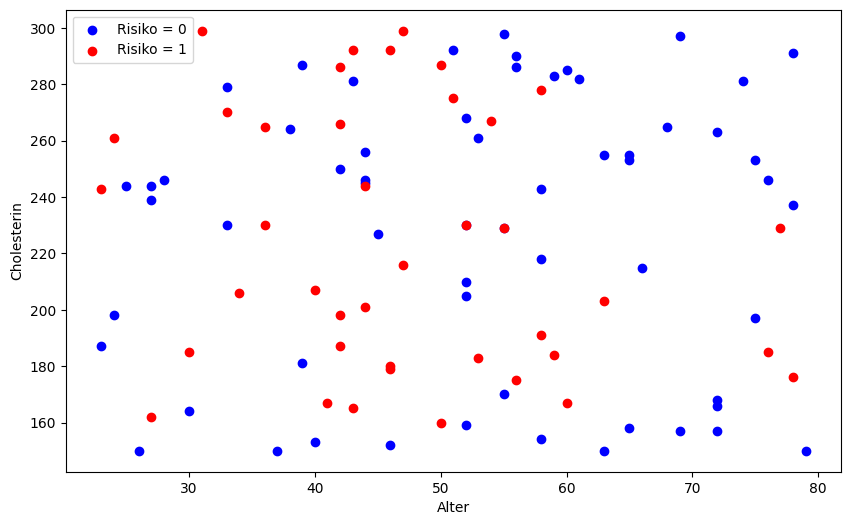

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Herzinfarkt-Risiko'] == 0]['Alter'], df[df['Herzinfarkt-Risiko'] == 0]['Cholesterin'], color='blue', label='Risiko = 0')
plt.scatter(df[df['Herzinfarkt-Risiko'] == 1]['Alter'], df[df['Herzinfarkt-Risiko'] == 1]['Cholesterin'], color='red', label='Risiko = 1')
plt.xlabel('Alter')
plt.ylabel('Cholesterin')
plt.legend()
plt.show()